# Medidas de tendencia central

Las [medidas de tendencia central](https://es.wikipedia.org/wiki/Medidas_de_tendencia_central) son valores principales para caracterizar variables aleatorias.

La medida de tendencia central es un número situado hacia el centro de la distribución de los valores de una serie de observaciones (medidas), en la que se encuentra ubicado el conjunto de los datos.

Es importante que no todas las medidas de tendencia son aplicables a los dos tipos de variables, numéricas y categóricas, y que también algunas de ellas son más susceptibles a los valores extremos (outliers)

**Medidas de tendencia**

- Media
  - [Aritmética](https://es.wikipedia.org/wiki/Media_aritm%C3%A9tica)
  - [Geométrica](https://es.wikipedia.org/wiki/Media_geom%C3%A9trica)
  - [Armónica](https://es.wikipedia.org/wiki/Media_arm%C3%B3nica)
  - [Ponderada](https://es.wikipedia.org/wiki/Media_ponderada)
- [Mediana](https://es.wikipedia.org/wiki/Mediana_(estad%C3%ADstica))
- [Moda](https://es.wikipedia.org/wiki/Moda_(estad%C3%ADstica))
- [Error típico o desviación estándar](https://es.wikipedia.org/wiki/Desviaci%C3%B3n_t%C3%ADpica)

**Criterios de aplicación**

- No todas las medidas de tendencia central son aplicables a las variables numericas y categoricas, o sea, hay que tener en cuenta el tipo de variable a la hora de utilizarlas. 

- Alguna de ellas son mas suceptibles que otras a los valores extremos.


In [1]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats

Importamos la base de datos y empezamos a trabajar con ella

In [2]:
df = pd.read_csv('../data/bicicletas-compartidas.csv')
df.columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

Vamos a definir la variable con la cual vamos a generar el analisis. Lo haremos sobre las bicicleras compartidas.

In [3]:
y = df['bicis-compartidas'].values
y

array([182, 138, 134, ..., 337, 224, 139])

Vemos que **y** es un arreglo numérico. Ahora vamos a limpiar este arreglo de posibles 0 que tenga, ya que numpy no nos permitira hacer calculo con estos valores.

In [4]:
y = np.where(y == 0, 1, y)

In [5]:
np.min(y)

1

In [6]:
np.max(y)

7860

## Promedio aritmetico o media aritmetica

La [media aritmética](https://es.wikipedia.org/wiki/Media_aritm%C3%A9tica) también llamada promedio o media, de un conjunto finito de números es el valor característico de una serie de datos cuantitativos, objeto de estudio que parte del principio de la esperanza matemática o valor esperado, se obtiene a partir de la suma de todos sus valores dividida entre el número de sumandos.

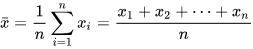

In [7]:
np.mean(y)

1143.1016997817849

In [8]:
np.sum(y)/len(y)

1143.1016997817849

Vemos que la media aritmética es de 1143 bicicletas compartidas

Documentacion oficial de scipy mstats:

https://docs.scipy.org/doc/scipy/reference/stats.mstats.html

## Promedio geometrica o media geométrica

La [media geométrica](https://es.wikipedia.org/wiki/Media_geom%C3%A9trica) de una cantidad arbitraria de números (por decir n números) es la raíz n-ésima del producto de todos los números; es recomendada para datos de progresión geométrica, para promediar razones, interés compuesto y números índice

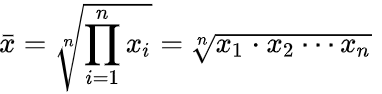

Frecuentemente se usa una media geométrica cuando se comparan diferentes aspectos, cuyos rendimientos tienen unidades de medida en diferentes rangos numéricos. 

Por ejemplo, la media geométrica puede dar un valor serio para comparar dos empresas que tienen una calificación entre 0 a 5 por su sostenibilidad ambiental, y una calificación entre 0 a 100 por su viabilidad financiera. Si se usara la media aritmética en lugar de la media geométrica, la viabilidad financiera tendría mayor peso porque su rango numérico es mayor. Es decir, un pequeño cambio porcentual en la calificación financiera (por ejemplo, pasar de 80 a 90) haría una diferencia mucho mayor en la media aritmética que un gran cambio porcentual en la sostenibilidad ambiental (por ejemplo, pasar de 2 a 5). El uso de la media geométrica normaliza los valores de rango diferente, lo que significa que un cambio de porcentaje dado en cualquiera de las propiedades tiene el mismo efecto en la media geométrica. Entonces, un cambio del 20% en la sostenibilidad ambiental de 4 a 4.8 tiene el mismo efecto en la media geométrica que un cambio del 20% en la viabilidad financiera de 60 a 72. 

Esto lo hacemos de la siguiente manera

In [9]:
scipy.stats.mstats.gmean(y)

623.2472122430046

## Promedio armonico o media armonica

La [media armónica](https://es.wikipedia.org/wiki/Media_arm%C3%B3nica) (designada usualmente mediante H) de una cantidad finita de números es igual al recíproco, o inverso, de la media aritmética de los recíprocos de dichos valores y es recomendada para promediar velocidades. 

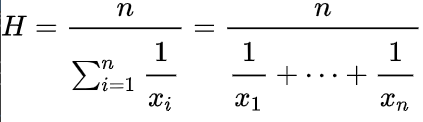


In [10]:
scipy.stats.mstats.hmean(y)

241.6518030513683

## Mediana

La [mediana](https://es.wikipedia.org/wiki/Mediana_(estad%C3%ADstica)) representa el valor de la variable de posición central en un conjunto de datos ordenados, en otras palabras el valor que divide a los datos en 2 partes. Coincide con el percentil 50% o 50% de los datos.


In [11]:
np.median(y)

844.0

## Moda

La [moda](https://es.wikipedia.org/wiki/Moda_(estad%C3%ADstica)) es el valor con mayor frecuencia en una de las distribuciones de datos.

In [12]:
# moda = valor de y con la maxima frecuencia

moda = np.nan # defino la variable moda

valores, conteo_valores = np.unique(y, return_counts=True) # Retorna array con valores unicos del array que le pase.

pos = np.argmax(conteo_valores) # Del conteo de valores retorname el valor máximo. Este será la posición
moda = valores[pos] # Con la posicion anterior encuentro el valor que mas se repite.

In [13]:
valores

array([   1,    9,   10, ..., 7208, 7531, 7860])

In [14]:
conteo_valores

array([1, 1, 1, ..., 1, 1, 1])

In [15]:
pos

38

In [16]:
moda

46

El valor que mas se repite es 46, 46 bicicletas compartidas.

En el siguiente gráfico podemos ver una comparativa entre estas medidas:

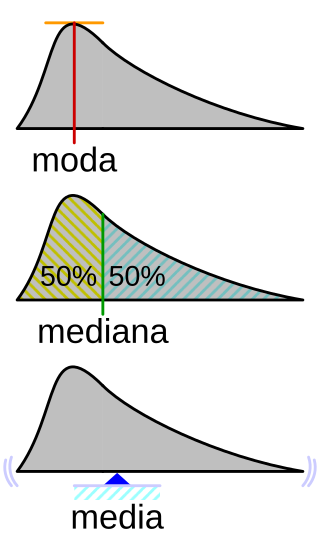

## Desviación estandar

La [desviación estandar](https://es.wikipedia.org/wiki/Desviaci%C3%B3n_t%C3%ADpica) es una medida que se utiliza para cuantificar la variación o la dispersión de un conjunto de datos numéricos.

Una desviación estándar baja indica que la mayor parte de los datos de una muestra tienden a estar agrupados cerca de su media (también denominada el valor esperado), mientras que una desviación estándar alta indica que los datos se extienden sobre un rango de valores más amplio. 

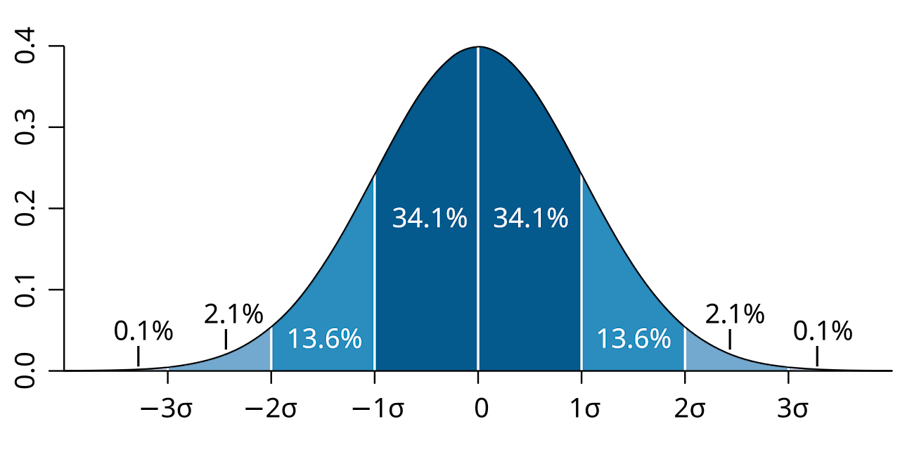

Una gráfica de la distribución normal (o curva en forma de campana, o curva de Gauss), donde cada banda tiene un ancho de una vez la desviación estándar

In [17]:
np.std(y)

1085.0768508213835

## Alteraciones

Podemos ver que los valores extremos alteran las medidas de tendencia centrla. Veamos esto con un ejemplo:

In [19]:
y_alterado = y.copy()
y_alterado[y_alterado == max(y_alterado)] = 10000000

In [20]:
print(np.mean(y))
print(np.mean(y_alterado))

1143.1016997817849
1716.9009417709888


In [21]:
print(np.median(y))
print(np.median(y_alterado))

844.0
844.0


Veamos lo anterior con un gráfico bastante representativo.

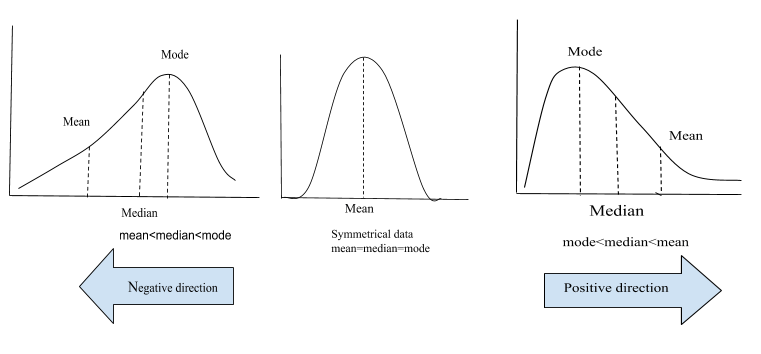

## **Ejercicio**

1. Calcula las medidas de tendencia central para la siguiente simulación de sueldos. Grafica su distribución

In [22]:
import pandas as pd
import numpy as np

# Simulación de datos de salarios con más frecuencia en los salarios bajos
np.random.seed(42)  # Para hacer la simulación reproducible
salarios = np.random.lognormal(mean=10, sigma=0.5, size=1000)  # Generar salarios con más concentración en valores bajos

In [39]:
df_salarios = pd.DataFrame(salarios,columns=['Salarios'])
print(df_salarios.describe())

media = df_salarios['Salarios'].mean()
mediana = df_salarios['Salarios'].median()
rango_medio = (df_salarios['Salarios'].max()-df_salarios['Salarios'].min())/2

print(media)
print(mediana)
print(rango_medio)

           Salarios
count  1.001000e+03
mean   2.358954e+05
std    6.668292e+06
min    4.356248e+03
25%    1.594202e+04
50%    2.231570e+04
75%    3.046565e+04
max    2.110000e+08
235895.43444745464
22315.695079383397
105497821.87618609


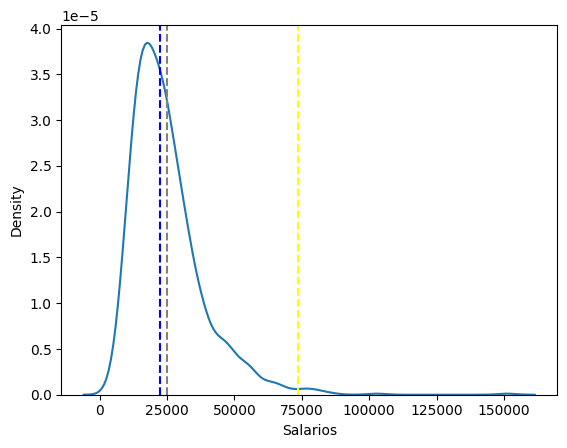

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(df_salarios['Salarios'])
plt.axvline(media, color='grey', linestyle='--')
plt.axvline(mediana, color='blue', linestyle='--')
plt.axvline(rango_medio, color='yellow', linestyle='--')

2. Añade un sueldo muy alto y vuelve a calcular y graficar. 
- Compara los valores resultantes
- Calcula el rango medio
- Calcular el rango de sueldos que más se repite con `np.histogram` en función del índice moda de las frecuencias


In [35]:
# Incluir un salario de 211 millones
salarios = np.append(salarios, 211000000)  # Añadir salario de 211 millones

In [38]:
df_salarios = pd.DataFrame(salarios,columns=['Salarios'])
print(df_salarios.describe())

media = df_salarios['Salarios'].mean()
mediana = df_salarios['Salarios'].median()
rango_medio = (df_salarios['Salarios'].max()-df_salarios['Salarios'].min())/2

print(media)
print(mediana)
print(rango_medio)

           Salarios
count  1.001000e+03
mean   2.358954e+05
std    6.668292e+06
min    4.356248e+03
25%    1.594202e+04
50%    2.231570e+04
75%    3.046565e+04
max    2.110000e+08
235895.43444745464
22315.695079383397
105497821.87618609


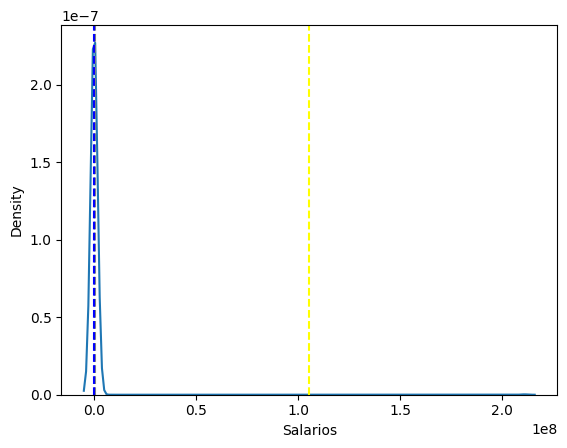

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(df_salarios['Salarios'])
plt.axvline(media, color='grey', linestyle='--')
plt.axvline(mediana, color='blue', linestyle='--')
plt.axvline(rango_medio, color='yellow', linestyle='--')